# Random forests and other ensemble methods

An **ensemble** is a combination of estimators that performs better than each of its components.

## Bagging

**Bootstrap aggregating**, or bagging, is an ensemble meta-algorithm that can reduce the variance in an estimator. When the component estimators are regressors, the ensemble averages their predictions. When the component estimator are classifiers, the ensemble returns the mode class.

Bagging is a useful meta-algorithm for estimators that have high variance and low bias such as decision trees.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, n_features=100, n_informative=20,
                          n_clusters_per_class=2, random_state=11)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       127
           1       0.68      0.75      0.71       123

    accuracy                           0.70       250
   macro avg       0.71      0.70      0.70       250
weighted avg       0.71      0.70      0.70       250



## Boosting

Primarily used to reduce the bias of an estimator. On the first iteration, `AdaBoost` assigns equal weights to all of training instances and then trains a weak lerner. A **weak learner** is defined only as estimator.

Decision tree accuracy: 0.688


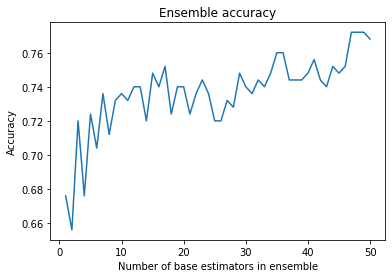

In [10]:
%matplotlib inline

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000,n_features=50,n_informative=30,n_clusters_per_class=3,random_state=11)
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=11)

clf = DecisionTreeClassifier(random_state=11)
clf.fit(X_train,y_train)
print('Decision tree accuracy: %s' % clf.score(X_test, y_test))

clf = AdaBoostClassifier(n_estimators=50,random_state=11)
clf.fit(X_train,y_train)

plt.title('Ensemble accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of base estimators in ensemble')
plt.plot(range(1, 51), [accuracy for accuracy in clf.staged_score(X_test, y_test)])

## Stacking

**Stacking** is an approach to creating ensembles; it uses a meta-estimator to combine the predictions of base estimators.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.base import clone,BaseEstimator,TransformerMixin,ClassifierMixin

class StackingClassifier(BaseEstimator, ClassifierMixin, TransformerMixin):
    
    def __init__(self, classifiers):
        self.classifiers = classifiers
        self.meta_classifier = DecisionTreeClassifier()
        
    def fit(self, X, y):
        for clf in self.classifiers:
            clf.fit(X, y)
        self.met_classifier.fit(self._get_meta_features(X), y)
        return self
    
    def _get_meta_features(self, X):
        probaes = np.asarray([clf.predict_proba(X) for clf in self.classifiers])
        return np.concatenate(probas, axis=1)
    
    def predict(self, X):
        return self.meta_classifier.predict(self._get_meta_features(X))
    
    def predict_proba(self, X):
        return self.meta_classifier.predict_proba(self._get_meta_features(X))
    
X, y = make_classification(n_samples=1000,n_features=50,n_informative=30,random_state=11)
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=11)

lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print('Logistic regresion accuracy: %s' % lr.score(X_test, y_test))

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('KNN accuracy: %s' % knn_clf.score(X_test, y_test))

base_classifiers = [lr, knn_clf]
stacking_clf = StackingClassifier(base_classifiers)
stacking_clf.fit(X_train, y_train)
print('Stacking classifiers accuracy: %s' % knn_clf.score(X_test, y_test))

Logistic regresion accuracy: 0.816
KNN accuracy: 0.912
